In [1]:
import numpy as np
import pandas as pd
import os 

In [2]:
os.getcwd()

'C:\\Users\\38164\\Desktop\\Finance HEC\\finance_project_hec\\model_milos'

### Load and preprocess data

In [3]:
past_df = pd.read_csv('PastLoans.csv')
app_df = pd.read_csv('NewApplications_1_Round1.csv')

In [4]:
past_df

,id,sex,married,employment,income,digital1,digital2,digital3,default
0,1,M,0,employed,50215.0,0.213,0.193,0.032,0
1,2,M,0,student,14499.0,0.465,0.731,0.472,0
2,3,M,1,retired,32448.0,0.147,0.018,0.113,0
3,4,M,0,student,8627.0,0.212,0.346,0.148,0
4,5,F,1,employed,17259.0,0.384,0.252,0.551,0
...,...,...,...,...,...,...,...,...,...
99995,99996,M,1,student,13448.0,0.737,0.692,0.469,0
99996,99997,M,0,student,6534.0,0.719,0.752,0.077,0
99997,99998,M,1,unemployed,28017.0,0.433,0.361,0.355,0
99998,99999,M,1,employed,33664.0,0.510,0.322,0.376,1


<AxesSubplot:>

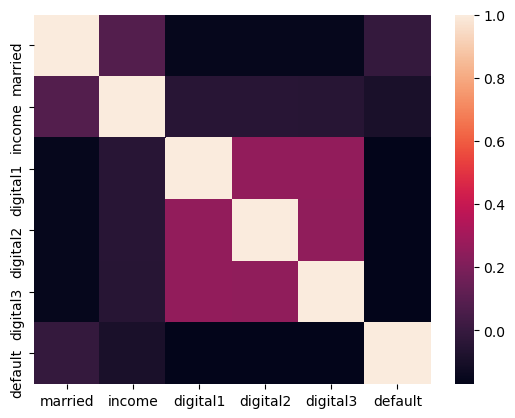

In [21]:
import seaborn as sns
sns.heatmap(past_df.corr())

In [5]:
app_df

,id,sex,married,employment,income,digital1
0,100001,M,0,student,12394.0,0.491
1,100002,M,0,employed,36385.0,0.450
2,100003,M,0,student,14945.0,0.756
3,100004,F,1,employed,17874.0,0.618
4,100005,M,0,employed,34250.0,0.453
...,...,...,...,...,...,...
99995,199996,F,0,unemployed,19391.0,0.661
99996,199997,F,0,retired,12378.0,0.079
99997,199998,F,1,retired,31569.0,0.185
99998,199999,F,1,unemployed,24867.0,0.537


In [6]:
past_df.drop(['id'], axis=1, inplace=True)
app_df.drop(['id'], axis=1, inplace=True)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder() 

C:\Users\38164\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [8]:
employment_df_past = pd.DataFrame(enc.fit_transform(past_df[['employment']]).toarray(), columns=enc.categories_)
employment_df_app = pd.DataFrame(enc.fit_transform(past_df[['employment']]).toarray(), columns=enc.categories_)

In [9]:
df_train = past_df.join(employment_df_past)
df_test = app_df.join(employment_df_app)

In [10]:
df_train = df_train.rename(columns = { ('employed',): 'employed', ('retired',): 'retired', ('student',): 'student', ('unemployed',): 'unemployed' })
df_test = df_test.rename(columns = { ('employed',): 'employed', ('retired',): 'retired', ('student',): 'student', ('unemployed',): 'unemployed' })

In [11]:
df_train = df_train.drop(['employment'], axis=1)
df_test = df_test.drop(['employment'], axis=1)

In [12]:
df_train.sex = df_train.sex.map({'M': 1, 'F': 0})
df_test.sex = df_test.sex.map({'M': 1, 'F': 0})

In [13]:
df_train

,sex,married,income,digital1,digital2,digital3,default,employed,retired,student,unemployed
0,1,0,50215.0,0.213,0.193,0.032,0,1.0,0.0,0.0,0.0
1,1,0,14499.0,0.465,0.731,0.472,0,0.0,0.0,1.0,0.0
2,1,1,32448.0,0.147,0.018,0.113,0,0.0,1.0,0.0,0.0
3,1,0,8627.0,0.212,0.346,0.148,0,0.0,0.0,1.0,0.0
4,0,1,17259.0,0.384,0.252,0.551,0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
99995,1,1,13448.0,0.737,0.692,0.469,0,0.0,0.0,1.0,0.0
99996,1,0,6534.0,0.719,0.752,0.077,0,0.0,0.0,1.0,0.0
99997,1,1,28017.0,0.433,0.361,0.355,0,0.0,0.0,0.0,1.0
99998,1,1,33664.0,0.510,0.322,0.376,1,1.0,0.0,0.0,0.0


In [14]:
df_test

,sex,married,income,digital1,employed,retired,student,unemployed
0,1,0,12394.0,0.491,1.0,0.0,0.0,0.0
1,1,0,36385.0,0.450,0.0,0.0,1.0,0.0
2,1,0,14945.0,0.756,0.0,1.0,0.0,0.0
3,0,1,17874.0,0.618,0.0,0.0,1.0,0.0
4,1,0,34250.0,0.453,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99995,0,0,19391.0,0.661,0.0,0.0,1.0,0.0
99996,0,0,12378.0,0.079,0.0,0.0,1.0,0.0
99997,0,1,31569.0,0.185,0.0,0.0,0.0,1.0
99998,0,1,24867.0,0.537,1.0,0.0,0.0,0.0


In [50]:
train_x = df_train.loc[:][['sex', 'married', 'income', 'digital1', 'employed', 'retired', 'student', 'unemployed']]
train_y = df_train.loc[:][['default']]

In [51]:
train_x

,sex,married,income,digital1,employed,retired,student,unemployed
0,1,0,50215.0,0.213,1.0,0.0,0.0,0.0
1,1,0,14499.0,0.465,0.0,0.0,1.0,0.0
2,1,1,32448.0,0.147,0.0,1.0,0.0,0.0
3,1,0,8627.0,0.212,0.0,0.0,1.0,0.0
4,0,1,17259.0,0.384,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
99995,1,1,13448.0,0.737,0.0,0.0,1.0,0.0
99996,1,0,6534.0,0.719,0.0,0.0,1.0,0.0
99997,1,1,28017.0,0.433,0.0,0.0,0.0,1.0
99998,1,1,33664.0,0.510,1.0,0.0,0.0,0.0


In [52]:
train_y

,default
0,0
1,0
2,0
3,0
4,0
...,...
99995,0
99996,0
99997,0
99998,1


In [53]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train_x, train_y)
clf.predict_proba(df_test)

C:\Users\38164\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0.64687427, 0.35312573],
       [0.85533314, 0.14466686],
       [0.67478763, 0.32521237],
       ...,
       [0.82373236, 0.17626764],
       [0.77109666, 0.22890334],
       [0.74533834, 0.25466166]])

In [54]:
proba = clf.predict_proba(df_test)[:, 1]

<AxesSubplot:ylabel='Count'>

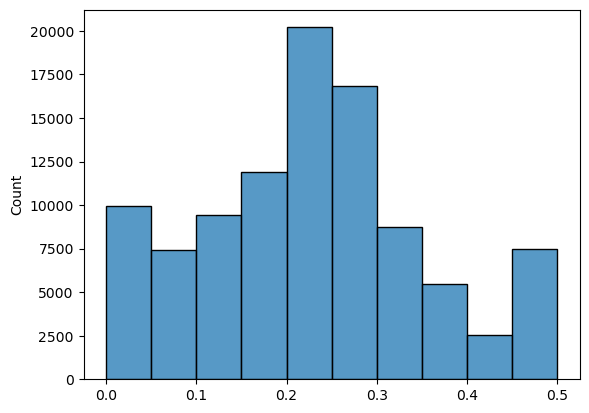

In [55]:
sns.histplot(proba, bins=10)